<a href="https://colab.research.google.com/github/sankarsh777/GDSC-AIML-SANKARSH-B241162ME/blob/main/beginner_question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict#removes tedious code


from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/Groceries data.csv")

transactions = df.apply(lambda x: list(x.dropna()), axis=1).tolist()
n_transactions = len(transactions)
print(n_transactions)


38765


In [ ]:
item_counts = defaultdict(int)#creates dictionary with values for everything set as 0

for t in transactions:
        item_counts[t[2]] += 1

item_freq = pd.Series(item_counts).sort_values(ascending=False)


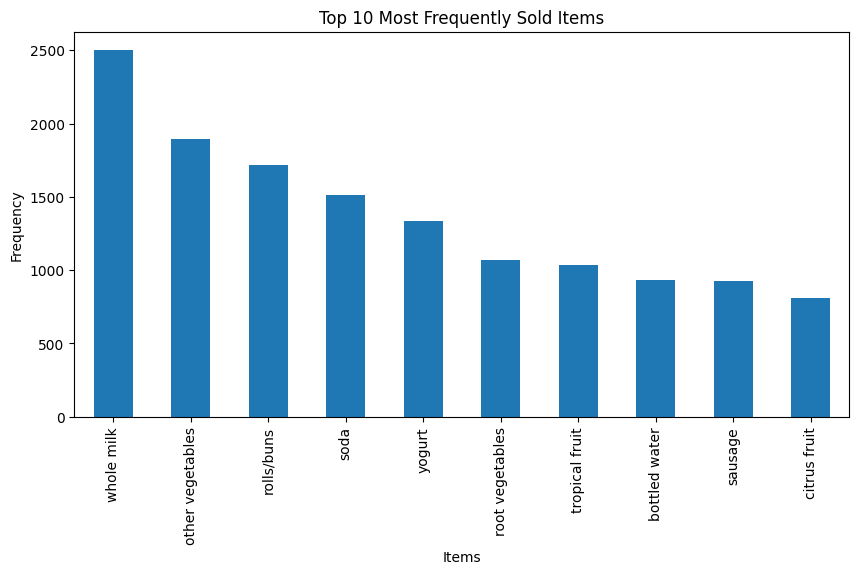

In [ ]:
plt.figure(figsize=(10,5))
item_freq.head(10).plot(kind='bar')
plt.title("Top 10 Most Frequently Sold Items")#these items mustt be in store as they are sold more
plt.xlabel("Items")
plt.ylabel("Frequency")
plt.show()#as observed highest freq is for whole milk answered both b and c

In [ ]:
df_basket = pd.read_csv("/content/basket.csv")

transactions = df_basket.apply(lambda row: [str(item).strip() for item in row if pd.notna(item)],axis=1).tolist()
len(transactions)#just to see if its correct

14963

In [ ]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

basket_df = pd.DataFrame(te_array, columns=te.columns_)


In [ ]:
frequent_itemsets = apriori(basket_df,min_support=0.01,use_colnames=True)#grouping

rules = association_rules(frequent_itemsets,metric="confidence",min_threshold=0.01)#min threshold for confidence here
rules = rules.sort_values(by="lift", ascending=False)


In [ ]:
rules[["antecedents", "consequents", "support", "confidence", "lift"]].head(10)


,antecedents,consequents,support,confidence,lift
9,(whole milk),(yogurt),0.011161,0.070673,0.822940
8,(yogurt),(whole milk),0.011161,0.129961,0.822940
5,(whole milk),(rolls/buns),0.013968,0.088447,0.804028
4,(rolls/buns),(whole milk),0.013968,0.126974,0.804028
1,(other vegetables),(rolls/buns),0.010559,0.086481,0.786154
0,(rolls/buns),(other vegetables),0.010559,0.095990,0.786154
3,(other vegetables),(whole milk),0.014837,0.121511,0.769430
2,(whole milk),(other vegetables),0.014837,0.093948,0.769430
7,(whole milk),(soda),0.011629,0.073635,0.758296
6,(soda),(whole milk),0.011629,0.119752,0.758296


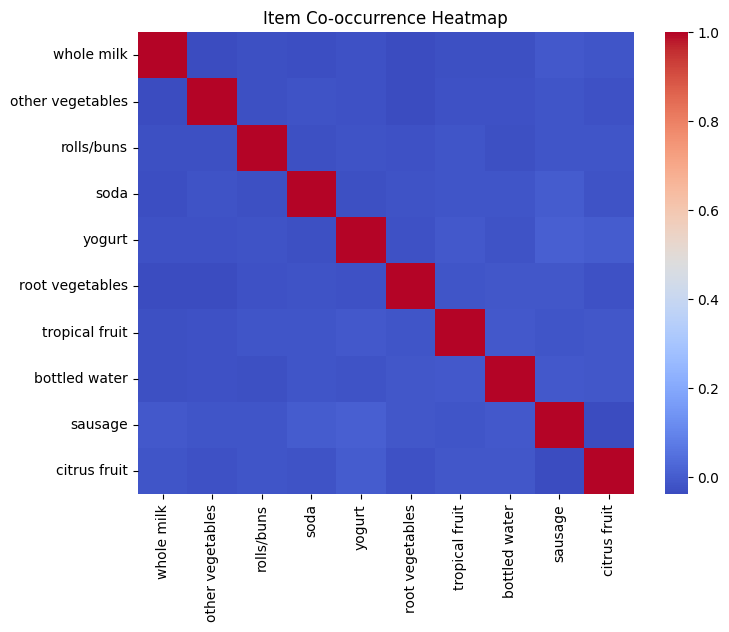

In [ ]:
top_items = item_freq.head(10).index.tolist()#finding items bought most together

plt.figure(figsize=(8,6))
sns.heatmap(basket_df[top_items].corr(), cmap="coolwarm")
plt.title("Item Co-occurrence Heatmap")
plt.show()


In [ ]:
customer_features = pd.DataFrame({"items_count": basket_df.sum(axis=1)})

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_features)#scaling features

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)#using module to cluster
customer_features["Cluster"] = kmeans.fit_predict(X_scaled)
customer_features["Cluster"].value_counts()

,count
Cluster,
0,12944
1,1611
2,408


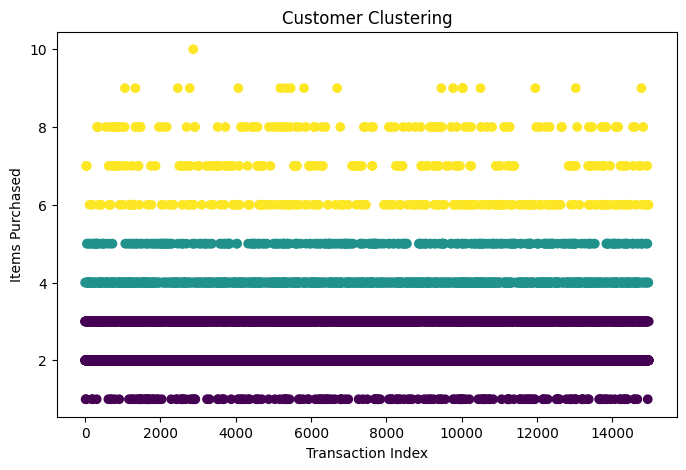

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(
    customer_features.index,
    customer_features["items_count"],
    c=customer_features["Cluster"]
)
plt.xlabel("Transaction Index")
plt.ylabel("Items Purchased")
plt.title("Customer Clustering")
plt.show()
